In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv(r"C:\Users\ATHARV\Downloads\Practical2-20240423T163643Z-001\Practical2\column_3C_weka.csv")

In [16]:
data.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


<Axes: title={'center': 'scaral_slope'}, ylabel='Frequency'>

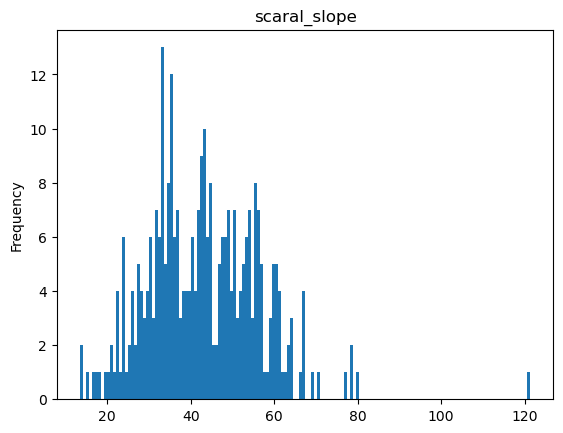

In [37]:
data['sacral_slope'].plot(kind='hist',bins=150,title='scaral_slope')

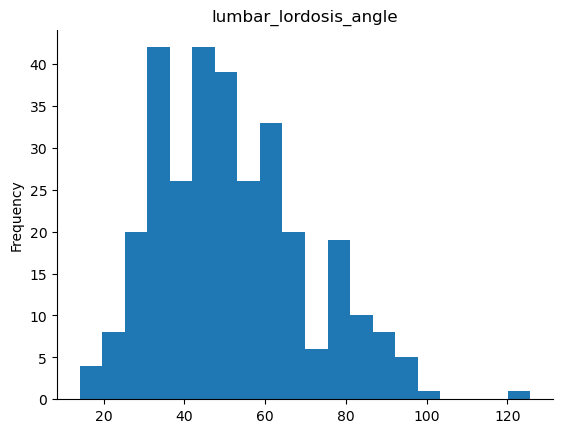

In [35]:
data['lumbar_lordosis_angle'].plot(kind='hist',bins=20,title='lumbar_lordosis_angle')
plt.gca().spines[['top','right',]].set_visible(False)

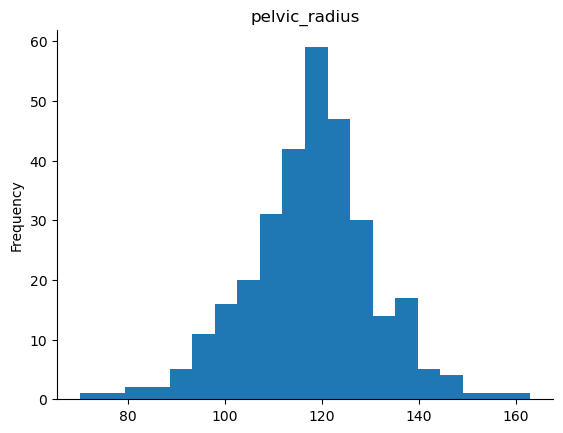

In [25]:
data['pelvic_radius'].plot(kind='hist',bins=20,title='pelvic_radius')
plt.gca().spines[['top','right',]].set_visible(False)

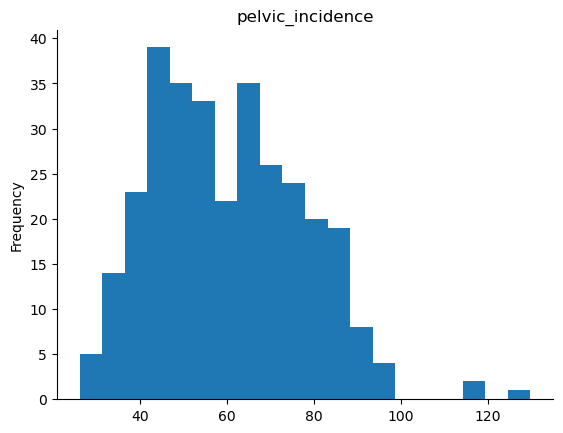

In [26]:
data['pelvic_incidence'].plot(kind='hist',bins=20,title='pelvic_incidence')
plt.gca().spines[['top','right',]].set_visible(False)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [28]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


array([[<Axes: xlabel='pelvic_incidence', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_incidence'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_incidence'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_incidence'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_incidence'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='pelvic_tilt'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_tilt'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_tilt'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_tilt'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_tilt'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='pelvic_tilt', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='lumbar_lordosis_an

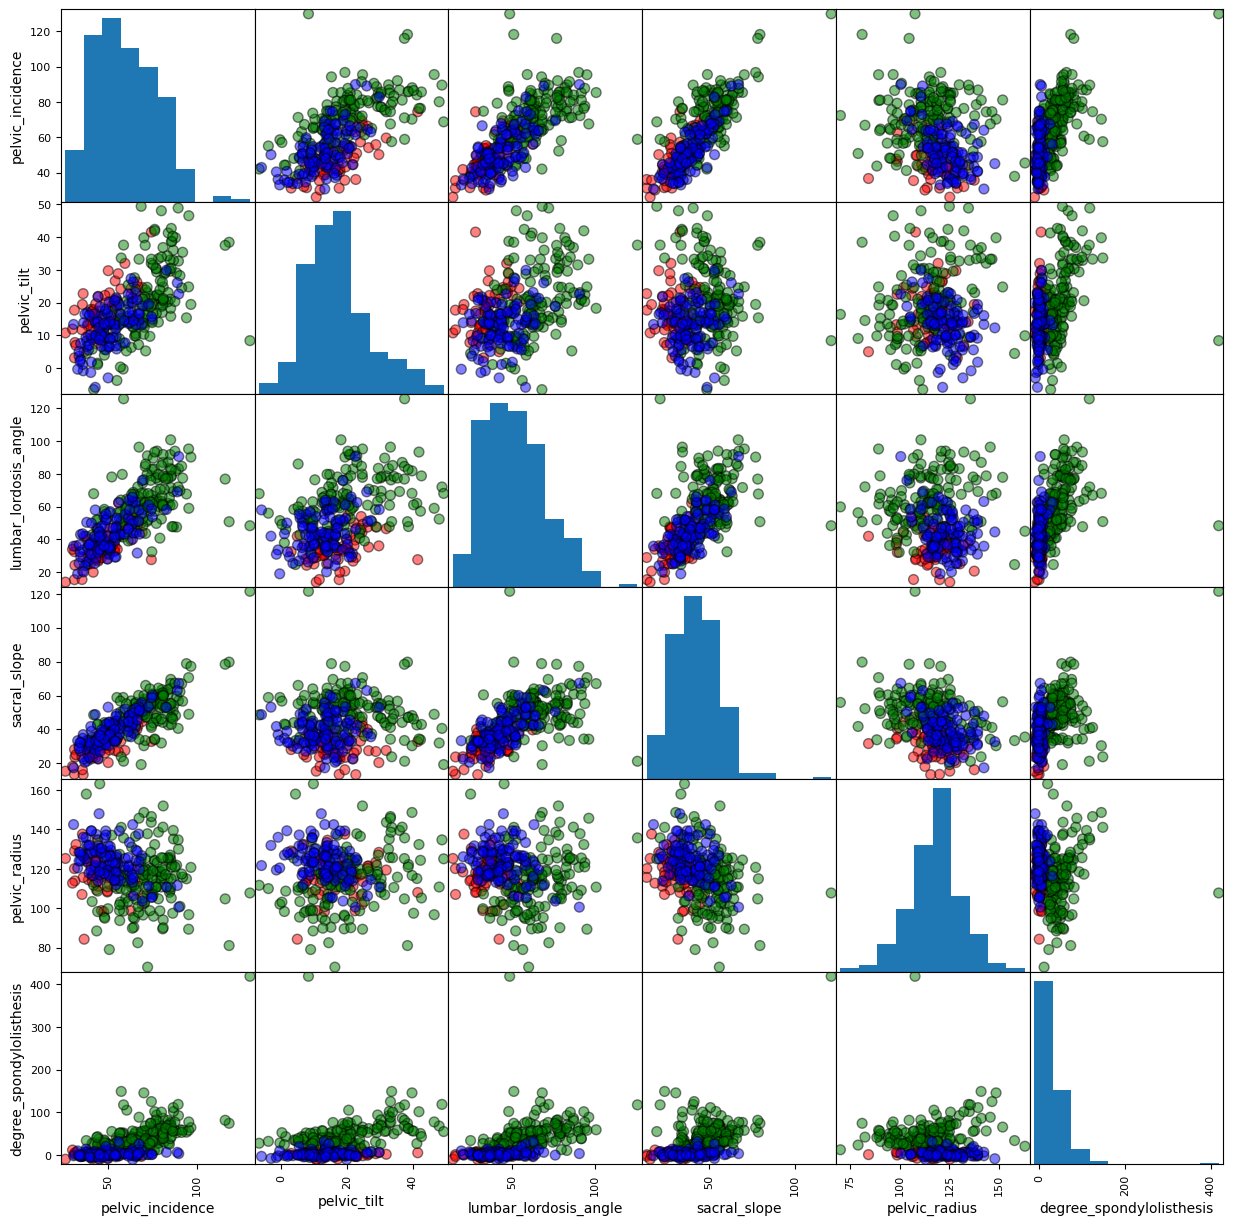

In [32]:
color_list = ['red' if i=='Hernia' else 'blue' if i=='Normal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:,data.columns!='class'],c=color_list,figsize=[15,15],diagonal='hist',alpha=0.5,s=200,edgecolor='black')

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

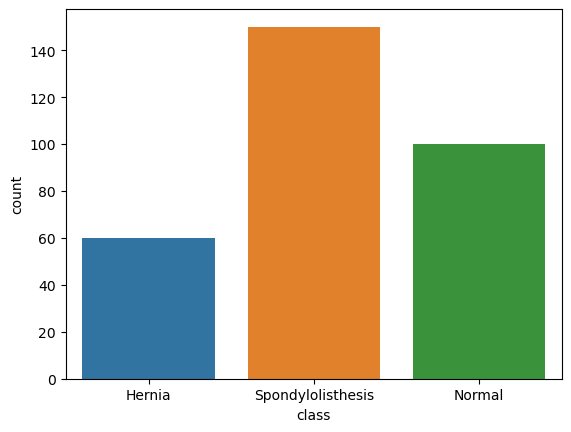

In [33]:
sns.countplot(x="class",data=data)
data.loc[:,'class'].value_counts()

In [42]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
x,y=data.loc[:,data.columns!='class'],data.loc[:,'class']
knn.fit(x,y)
pred = knn.predict(x)
print('Prediction {}'.format(pred))
print(knn.score(x,y))

Prediction ['Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Hernia'
 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Normal' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Hernia'
 'Normal' 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthes

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y=data.loc[:,data.columns!='class'],data.loc[:,'class']
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
# print('Prediction {}'.format(pred))
print(knn.score(x,y))

0.8806451612903226
